# <center> EDA-3. Проектирование признаков

In [1]:
# Импортируем необходимые библиотеки

import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [2]:
# Читаем датасет

wine_data = pd.read_csv('data/wine_cleared.csv', index_col=0)

display(wine_data.head())

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# для удобства сразу преобразуем признак в int
wine_data['price_round'] = wine_data['price'].round().astype(int)

# Преобразование года из строки
regex = '\d{4}' # регулярное выражение для нахождения чисел
wine_data['year'] = wine_data['title'].str.findall(regex).str.get(0)

# Бинарный признак, произвелось ли в США
wine_data['is_usa'] = wine_data['country'].apply(lambda x: 1 if x == 'US' else 0)

display(wine_data)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\telis\AppData\Local\Temp\ipykernel_137244\2818234038.py:5: SyntaxWarning: invalid escape sequence '\d'
  regex = '\d{4}' # регулярное выражение для нахождения чисел


,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004,1
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013,0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012,0


In [4]:
#Задание 2.1
display(wine_data['country'].value_counts())  #Framce, Italy

#Задание 2.2
wine_data['is_france'] = wine_data['country'].apply(lambda x: 1 if x == 'France' else 0)
wine_data['is_italy'] = wine_data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

display(wine_data['is_france'].sum(),  #22093
        wine_data['is_italy'].sum())  #19540

#Задание 2.3
wine_data['old_wine'] = wine_data['year'].apply(lambda x: 1 if float(x) < 2010 else 0)

display(wine_data['old_wine'].sum())  #39781

#Задание 2.7
wine_data['locality'] = wine_data['title'].str.findall('.*?\(([^)]*)\).*').str.get(0)
display(wine_data)


<>:17: SyntaxWarning: invalid escape sequence '\('
<>:17: SyntaxWarning: invalid escape sequence '\('
C:\Users\telis\AppData\Local\Temp\ipykernel_137244\240097506.py:17: SyntaxWarning: invalid escape sequence '\('
  wine_data['locality'] = wine_data['title'].str.findall('.*?\(([^)]*)\).*').str.get(0)


country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


22093

19540

39781

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0,Etna
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1,0,0,0,Lake Michigan Shore
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,Willamette Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0,Erben Müller-Burggraef
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004,1,0,0,1,Oregon
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013,0,1,0,0,Alsace
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012,0,1,0,0,Alsace


In [5]:
country_population = pd.read_csv('data/country_population.csv', sep=';')
display(country_population.head(), country_population.info())

country_area = pd.read_csv('data/country_area.csv', sep=';')
display(country_area.head(), country_area.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     241 non-null    object
 1   population  241 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  193 non-null    object 
 1   area     193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


,country,area
0,Russia,17075400.0
1,Canada,9984670.0
2,China,9596960.0
3,US,9372610.0
4,Brazil,8547000.0


None

In [6]:
#Задание 3.1
display(country_population[country_population['country'] == 'Italy']) #59097904

#Соединим таблицы по странам
wine_data = wine_data.join(country_population.set_index('country'), on='country')

#Задание 3.2
wine_data = wine_data.join(country_area.set_index('country'), on='country')
print('Площадь требуемой страны:', round(wine_data[wine_data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area'].squeeze())) #9372610

display(wine_data)

,country,population
24,Italy,"59,097,904"


Площадь требуемой страны: 9372610


,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,2013,0,0,1,0,Etna,"59,097,904",301230.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,Quinta dos Avidagos,15,2011,0,0,0,0,Douro,"10,347,892",92391.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,Rainstorm,14,2013,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,St. Julian,13,2013,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,Sweet Cheeks,65,2012,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0,Erben Müller-Burggraef,"83,129,285",357022.0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,Citation,75,2004,1,0,0,1,Oregon,"333,022,386",9372610.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,Domaine Gresser,30,2013,0,1,0,0,Alsace,"68,035,000",547030.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,Domaine Marcel Deiss,32,2012,0,1,0,0,Alsace,"68,035,000",547030.0


In [7]:
#Задание 4.5

wine_data['year'] = pd.to_datetime(wine_data['year'], errors = 'coerce')
wine_data['years_diff'] = pd.to_datetime('12.01.2022', dayfirst=True) - wine_data['year']
display(wine_data['years_diff'].max())  #98627


#Задание 5.3
#Так и не понял, зачем оно нужно, и в чем смысл кодировать года
#Поэтому этот пункт выполняю, чтобы исключить будущие конфликты
ord_encoder = ce.OrdinalEncoder()
year_col = ord_encoder.fit_transform(wine_data['year'])
data = pd.concat([wine_data, year_col], axis=1)  #Ответ любой


#Задание 5.4

encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True)
wine_data = pd.concat([wine_data, encoder.fit_transform(wine_data['taster_name'])], axis=1)

display(wine_data.info())  #20


#Задание 5.5

binary_encoder = ce.BinaryEncoder(cols=['country'])
wine_data = pd.concat([wine_data, binary_encoder.fit_transform(wine_data['country'])], axis=1)

display(wine_data.info())  #6


#Задание 5.8

binary_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
wine_data = pd.concat([wine_data, binary_encoder.fit_transform(wine_data['taster_twitter_handle'])], axis=1)

display(wine_data.info())  #5


#Задание 5.9

list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

encoder = ce.OneHotEncoder(cols=['payment_type'], use_cat_names=True)
df = pd.concat([df, encoder.fit_transform(df['payment_type'])], axis=1)

binary_encoder = ce.BinaryEncoder(cols=['product'])
df = pd.concat([df, binary_encoder.fit_transform(df['product'])], axis=1)

df

Timedelta('98627 days 00:00:00')

<class 'pandas.core.frame.DataFrame'>
Index: 129972 entries, 0 to 129970
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   country                         129909 non-null  object         
 1   description                     129972 non-null  object         
 2   designation                     129972 non-null  object         
 3   points                          129972 non-null  int64          
 4   price                           129972 non-null  float64        
 5   province                        129909 non-null  object         
 6   region_1                        129972 non-null  object         
 7   taster_name                     129972 non-null  object         
 8   taster_twitter_handle           129972 non-null  object         
 9   title                           129972 non-null  object         
 10  variety                         129971 non-null  

None

<class 'pandas.core.frame.DataFrame'>
Index: 129972 entries, 0 to 129970
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   country                         129909 non-null  object         
 1   description                     129972 non-null  object         
 2   designation                     129972 non-null  object         
 3   points                          129972 non-null  int64          
 4   price                           129972 non-null  float64        
 5   province                        129909 non-null  object         
 6   region_1                        129972 non-null  object         
 7   taster_name                     129972 non-null  object         
 8   taster_twitter_handle           129972 non-null  object         
 9   title                           129972 non-null  object         
 10  variety                         129971 non-null  

None

<class 'pandas.core.frame.DataFrame'>
Index: 129972 entries, 0 to 129970
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   country                         129909 non-null  object         
 1   description                     129972 non-null  object         
 2   designation                     129972 non-null  object         
 3   points                          129972 non-null  int64          
 4   price                           129972 non-null  float64        
 5   province                        129909 non-null  object         
 6   region_1                        129972 non-null  object         
 7   taster_name                     129972 non-null  object         
 8   taster_twitter_handle           129972 non-null  object         
 9   title                           129972 non-null  object         
 10  variety                         129971 non-null  

None

,product,price,payment_type,payment_type_Mastercard,payment_type_Visa,payment_type_Amex,product_0,product_1
0,Product1,1200,Mastercard,1,0,0,0,1
1,Product2,3600,Visa,0,1,0,1,0
2,Product3,7500,Amex,0,0,1,1,1


In [8]:
#Задание 6.4

normalizer = pp.RobustScaler()
df_temp = normalizer.fit_transform(pd.DataFrame(wine_data['price']))
df_temp = pd.DataFrame(df_temp, columns=['price'])
display(round(df_temp['price'].sum()))  #43501


#Задание 6.5

standartizer = pp.StandardScaler()
df_temp = standartizer.fit_transform(pd.DataFrame((pd.read_csv('data/wine_cleared.csv'))['price']))
df_temp = pd.DataFrame(df_temp, columns=['price'])
display(round(df_temp['price'][129968], 2))  #-0.14

43501

-0.14

<Axes: >

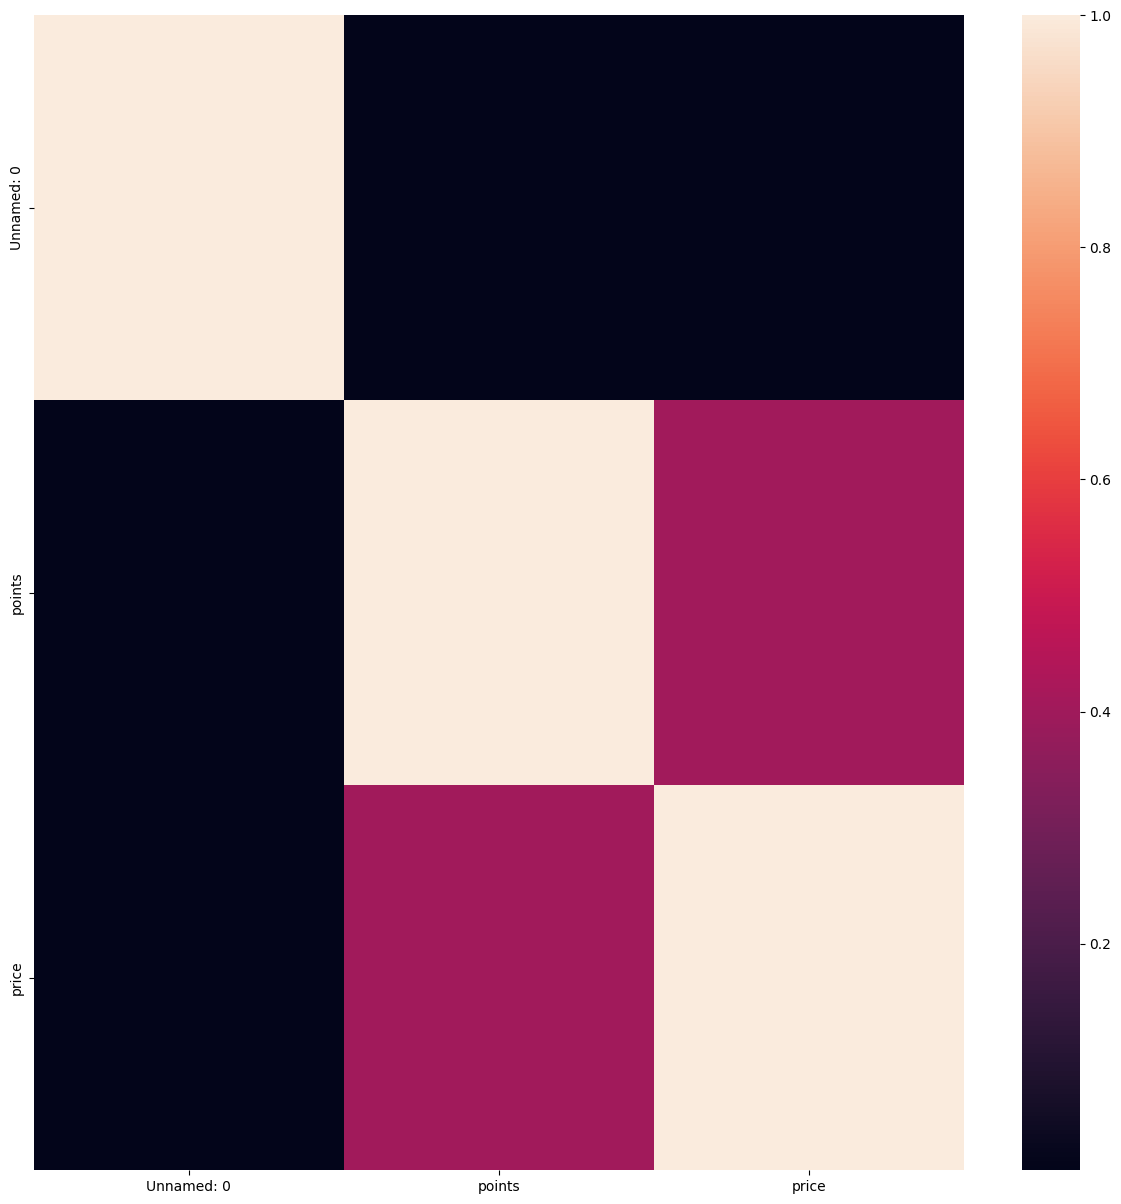

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.read_csv('data/wine_cleared.csv').corr(numeric_only=True))

In [10]:
wine_data

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,0,0,0,0,1,0,0,0,0,1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0,0,0,1,0,0,0,0,1,0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,0,0,0,1,1,0,0,0,1,1
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,0,0,0,1,1,0,0,1,0,0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,0,0,1,1,0,0,0,1,0,0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,0,0,0,1,1,0,0,0,1,1
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,0,0,1,0,1,0,0,0,1,0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,0,0,1,0,1,0,0,0,1,0
